In [2]:
#Using the UCI Machine Learning Dataset to determine who has heart disease
import pandas as pd
heart_disease = pd.read_csv("heart.csv")

#Finding the shape of the dataset
heart_disease.shape

(303, 14)

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Adding the class label to distingish between misdiagnosed patients with heart disease
heart_disease["class"] = heart_disease.target

#Counting the amount of cases of heart disease (1 = people that have it, 0 = misdiagnosed)
pd.value_counts(heart_disease["class"])

1    165
0    138
Name: class, dtype: int64

In [5]:
#Adding the number of diagnosed cases to the dataset
heart_disease.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


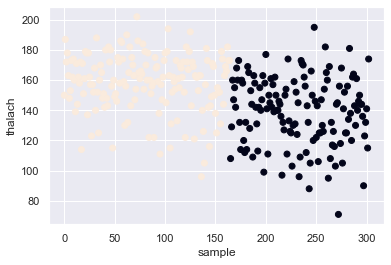

In [10]:
#Plotting the amount of diagnosed cases
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x = range(len(heart_disease["thalach"]))
y = heart_disease["thalach"]
plt.scatter(x,y,c=heart_disease["class"])
plt.xlabel("sample")
plt.ylabel("thalach")
plt.show()

In [11]:
#Training the heart disease model
X = heart_disease.iloc[:,:-1]
y = heart_disease["class"]
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing. 
# The random_state allows us to make the same random split every time.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=327)
print('Training data size: (%i,%i)' % X_train.shape)
print('Testing data size: (%i,%i)' % X_test.shape) 

Training data size: (242,14)
Testing data size: (61,14)


In [12]:
#Scale the data so that it has a mean of zero and a uniform standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Training set mean by feature:')
print(X_train.mean(axis=0))
print('Training set standard deviation by feature:')
print(X_train.std(axis=0))

Training set mean by feature:
[ 1.02764445e-16 -3.67015876e-17 -2.20209526e-17  2.12869208e-16
 -7.34031752e-17  3.48665082e-17 -7.43207149e-17  2.67921589e-16
 -1.13774922e-16  4.40419051e-17 -7.34031752e-18 -4.58769845e-18
  2.34890161e-16 -8.80838102e-17]
Training set standard deviation by feature:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
#Training the model
from sklearn.linear_model import LogisticRegression
regression_model = LogisticRegression()
regression_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#Measuring how accurate our model is for predicting the amount of people that have benign or malignant tumors
from sklearn.metrics import accuracy_score
y_pred = regression_model.predict(X_test)
test_acc = accuracy_score(y_test,y_pred)*100
print('The test set accuracy is %4.2f%%' % test_acc)

The test set accuracy is 100.00%


In [20]:
#Generating the Confusion Matrix for True Positives and Negatives and False Postives and Negatives
#True Positive = Diagnosed; True Negative = Misdiagnosed; False Positive = Beliving they're diagnosed but not; False Negative = Believing they're misdiagnosed but not
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
print("Confusion matrix:")
print(conf_matrix, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[31  0]
 [ 0 30]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


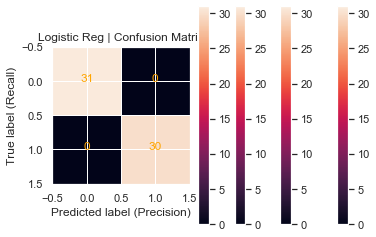

In [21]:
#Plot for Confusion Matrix
import itertools
plt.imshow(conf_matrix, interpolation='nearest')
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, conf_matrix[i, j],horizontalalignment="center",color="orange")
    plt.ylabel('True label (Recall)')
    plt.xlabel('Predicted label (Precision)')
    plt.title('Logistic Reg | Confusion Matrix')
    plt.colorbar();

In [22]:
#Assiging the True and False Postives/Negatives as variables for more metrics
# True negatives
TN = conf_matrix[0][0]
# True positives
TP = conf_matrix[1][1]
# False negatives
FN = conf_matrix[1][0]
# False positives
FP = conf_matrix[0][1]

#Finding the amount of True Postives that we actally classified
TPR = float(TP)/(TP+FN)
print('TPR = %4.2f%%' % (TPR*100))

TPR = 100.00%


In [23]:
#Finding the amount of True Negatives that we actually classified
TNR = float(TN)/(TN+FP)
print('TNR = %4.2f%%' % (TNR*100))

TNR = 100.00%


In [24]:
#Finding the amount of False Positives that we predicted
PPV = float(TP)/(TP+FP)
print('PPV = %4.2f%%' % (PPV*100))

PPV = 100.00%


In [25]:
#Finding the amount of False Negatives that we predicted 
NPV = float(TN)/(TN+FN)
print('NPV = %4.2f%%' % (NPV*100))

NPV = 100.00%
